In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from PIL import Image


In [22]:
def load_and_resize_image(image_path, target_size=(128, 128)):
    img = load_img(image_path, target_size=target_size)
    img = img_to_array(img)
    img = img / 255.0
    return img

def load_dataset_from_folder(folder_path, target_size=(128, 128)):
    images = []

    # Loop semua file dalam folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Hanya file gambar
            img_path = os.path.join(folder_path, filename)
            img = load_and_resize_image(img_path, target_size)
            images.append(img)

    images = np.array(images)
    return images

# Contoh penggunaan
folder_path = '/content/drive/MyDrive/Data daun'
all_images = load_dataset_from_folder(folder_path)

print(f"Jumlah gambar berhasil dimuat: {len(all_images)}")


Jumlah gambar berhasil dimuat: 25


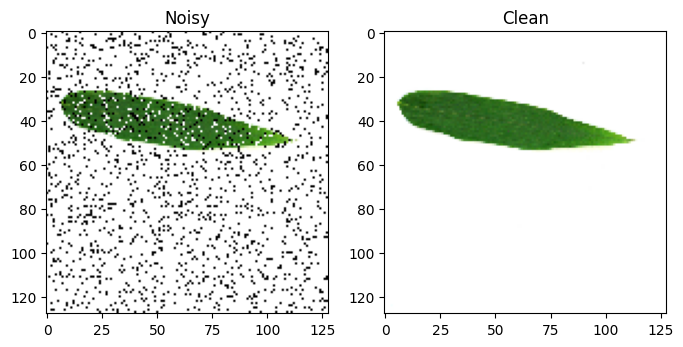

In [23]:
def add_salt_and_pepper_noise(image, amount=0.05):
    noisy_image = image.copy()
    row, col, ch = noisy_image.shape
    num_salt = int(amount * row * col)
    num_pepper = int(amount * row * col)

    # Salt (putih)
    for _ in range(num_salt):
        i = random.randint(0, row - 1)
        j = random.randint(0, col - 1)
        noisy_image[i, j] = 1.0

    # Pepper (hitam)
    for _ in range(num_pepper):
        i = random.randint(0, row - 1)
        j = random.randint(0, col - 1)
        noisy_image[i, j] = 0.0

    return noisy_image

# Fungsi gabungan untuk load dataset dan tambahkan noise
def load_dataset_with_noise(folder_path, target_size=(128, 128), noise_amount=0.05):
    clean_images = []
    noisy_images = []

    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(folder_path, filename)
            img = load_and_resize_image(img_path, target_size)
            noisy_img = add_salt_and_pepper_noise(img, noise_amount)
            clean_images.append(img)
            noisy_images.append(noisy_img)

    return np.array(noisy_images), np.array(clean_images)

# Contoh penggunaan
folder_path = '/content/drive/MyDrive/Data daun'
X_noisy, X_clean = load_dataset_with_noise(folder_path, noise_amount=0.1)

# Menampilkan contoh hasil noisy dan clean
def show_example(index=0):
    plt.figure(figsize=(8,4))

    plt.subplot(1,2,1)
    plt.imshow(X_noisy[index])
    plt.title("Noisy")

    plt.subplot(1,2,2)
    plt.imshow(X_clean[index])
    plt.title("Clean")

    plt.show()

show_example(0)

In [25]:
from tensorflow.keras import layers, models

def build_autoencoder(input_shape=(128, 128, 3)):
    input_img = layers.Input(shape=input_shape)

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

autoencoder = build_autoencoder()
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,651 (295.51 KB)

 Trainable params: 75,651 (295.51 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from sklearn.model_selection import train_test_split

X_train_noisy, X_val_noisy, X_train_clean, X_val_clean = train_test_split(
    X_noisy, X_clean, test_size=0.2, random_state=42
)

# Training model
history = autoencoder.fit(
    X_train_noisy, X_train_clean,
    epochs=30,
    batch_size=8,
    shuffle=True,
    validation_data=(X_val_noisy, X_val_clean)
)


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - loss: 0.2259 - val_loss: 0.1214
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 455ms/step - loss: 0.1037 - val_loss: 0.0601
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 452ms/step - loss: 0.0569 - val_loss: 0.0733
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 816ms/step - loss: 0.0655 - val_loss: 0.0768
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 432ms/step - loss: 0.0708 - val_loss: 0.0775
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 437ms/step - loss: 0.0681 - val_loss: 0.0773
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 477ms/step - loss: 0.0663 - val_loss: 0.0755
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 456ms/step - loss: 0.0657 - val_loss: 0.0662
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 469ms/step - loss: 0.0601 - val_loss: 0.0619
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 718ms/step - loss: 0.0547 - val_loss: 0.0590
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 496ms/step - loss: 0.0495 - val_loss: 0.0513
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 443ms/step - loss: 0.0469 - val_loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


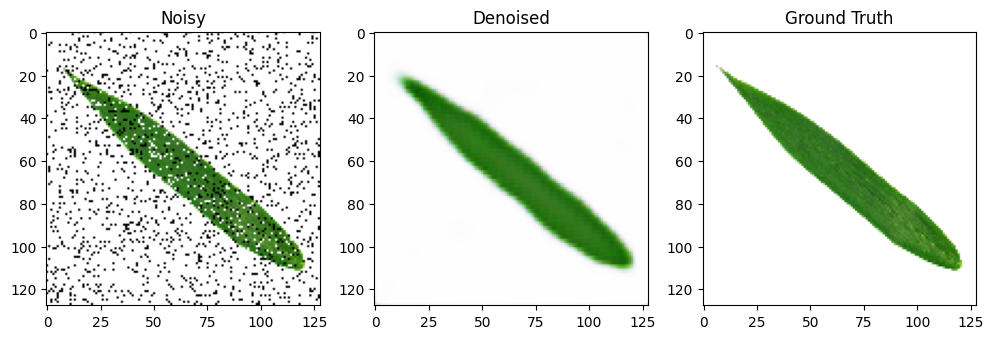

In [27]:
decoded_imgs = autoencoder.predict(X_val_noisy)

def show_results(noisy, decoded, clean, index=0):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(noisy[index])
    plt.title("Noisy")

    plt.subplot(1, 3, 2)
    plt.imshow(decoded[index])
    plt.title("Denoised")

    plt.subplot(1, 3, 3)
    plt.imshow(clean[index])
    plt.title("Ground Truth")

    plt.show()

show_results(X_val_noisy, decoded_imgs, X_val_clean, index=0)


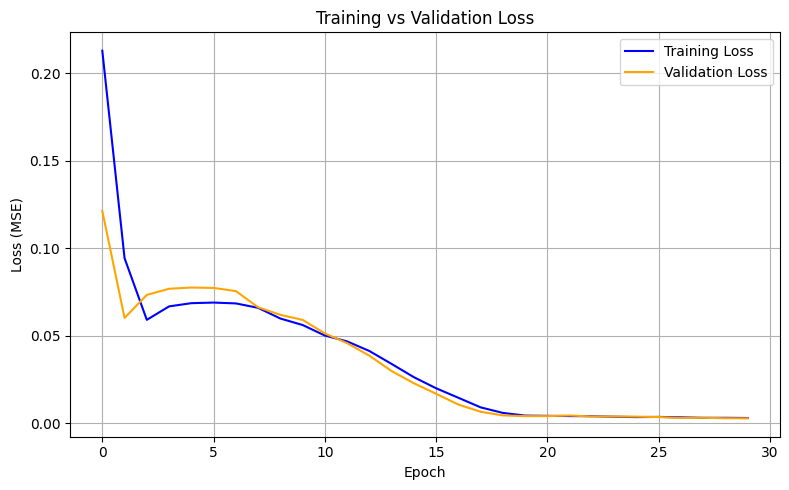

In [28]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Panggil fungsi setelah model selesai training
plot_training_history(history)


In [29]:
import os
import cv2

output_dir = "/content/drive/MyDrive/Dataset_Hasil_Denoising"
os.makedirs(f"{output_dir}/clean", exist_ok=True)
os.makedirs(f"{output_dir}/noisy", exist_ok=True)
os.makedirs(f"{output_dir}/denoised", exist_ok=True)

for i in range(len(X_val_noisy)):
    # Simpan clean image
    clean_img = (X_val_clean[i] * 255).astype('uint8')
    cv2.imwrite(f"{output_dir}/clean/{i:03d}.jpg", cv2.cvtColor(clean_img, cv2.COLOR_RGB2BGR))

    # Simpan noisy image
    noisy_img = (X_val_noisy[i] * 255).astype('uint8')
    cv2.imwrite(f"{output_dir}/noisy/{i:03d}.jpg", cv2.cvtColor(noisy_img, cv2.COLOR_RGB2BGR))

    # Simpan hasil denoising
    denoised_img = (decoded_imgs[i] * 255).astype('uint8')
    cv2.imwrite(f"{output_dir}/denoised/{i:03d}.jpg", cv2.cvtColor(denoised_img, cv2.COLOR_RGB2BGR))
